<a href="https://colab.research.google.com/github/sisifo3/P_T_2/blob/main/BSpline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# https://stackoverflow.com/questions/34803197/fast-b-spline-algorithm-with-numpy-scipy
# by : Fnord


import numpy as np
import scipy.interpolate as si


def bspline(cv, n=100, degree=3, periodic=False):
    """ Calculate n samples on a bspline

        cv :      Array ov control vertices
        n  :      Number of samples to return
        degree:   Curve degree
        periodic: True - Curve is closed
                  False - Curve is open
    """

    # If periodic, extend the point array by count+degree+1
    cv = np.asarray(cv)
    count = len(cv)

    if periodic:
        factor, fraction = divmod(count+degree+1, count)
        cv = np.concatenate((cv,) * factor + (cv[:fraction],))
        count = len(cv)
        degree = np.clip(degree,1,degree)

    # If opened, prevent degree from exceeding count-1
    else:
        degree = np.clip(degree,1,count-1)


    # Calculate knot vector
    kv = None
    if periodic:
        kv = np.arange(0-degree,count+degree+degree-1,dtype='int')
    else:
        kv = np.concatenate(([0]*degree, np.arange(count-degree+1), [count-degree]*degree))


    # Calculate query range
    u = np.linspace(periodic,(count-degree),n)


    # Calculate result
    return np.array(si.splev(u, (kv,cv.T,degree))).T

[[ 63.43452381  50.91666667]
 [ 68.02222812  55.40725663]
 [ 72.12839557  59.62621569]
 [ 75.79608758  63.59508072]
 [ 79.06619019  67.33432955]
 [ 81.97741413  70.86338089]
 [ 84.56629475  74.2005944 ]
 [ 86.86719207  77.36327063]
 [ 88.91229074  80.36765108]
 [ 90.73160009  83.22891814]
 [ 92.35295407  85.96119516]
 [ 93.8020113   88.57754636]
 [ 95.10225506  91.08997692]
 [ 96.27499326  93.50943292]
 [ 97.33935846  95.84580136]
 [ 98.3123079   98.10791018]
 [ 99.20862344 100.3035282 ]
 [100.04091161 102.43936521]
 [100.81960358 104.52107187]
 [101.55295517 106.55323979]
 [102.247047   108.53940157]
 [102.90594981 110.48211704]
 [103.53277108 112.38351933]
 [104.1303315  114.24566773]
 [104.70119768 116.07056481]
 [105.24768225 117.86015642]
 [105.77184377 119.61633168]
 [106.27548679 121.340923  ]
 [106.7601618  123.03570607]
 [107.2271653  124.70239984]
 [107.67753971 126.34266656]
 [108.11207347 127.95811174]
 [108.53130093 129.55028419]
 [108.93550247 131.12067598]
 [109.32470438

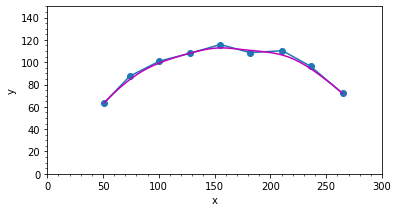

In [36]:
import matplotlib.pyplot as plt
colors = ('b', 'g', 'r', 'c', 'm', 'y', 'k')

cv = np.array([[ 50.,  25.],
   [ 59.,  12.],
   [ 50.,  10.],
   [ 57.,   2.],
   [ 40.,   4.],
   [ 40.,   14.]])

#cv = np.array([[100.95103092783505, 100.51030927835052], [63.43452380952381, 50.916666666666664], [72.05325443786982, 264.6686390532544], [87.40920716112532, 73.8542199488491], [97.16763005780346, 235.47687861271677], [107.93823529411765, 127.71470588235294], [111.00694444444444, 185.34722222222223], [106.59183673469387, 209.99489795918367], [115.8508064516129, 155.16129032258064]])
#cv = np.array([[63.43452380952381, 50.916666666666664],[100.95103092783505, 100.51030927835052], [72.05325443786982, 264.6686390532544], [87.40920716112532, 73.8542199488491], [97.16763005780346, 235.47687861271677], [107.93823529411765, 127.71470588235294], [111.00694444444444, 185.34722222222223], [106.59183673469387, 209.99489795918367], [115.8508064516129, 155.16129032258064]])
#cv = np.array([[63.43452380952381, 50.916666666666664],[87.40920716112532, 73.8542199488491],[100.95103092783505, 100.51030927835052], [72.05325443786982, 264.6686390532544], [97.16763005780346, 235.47687861271677], [107.93823529411765, 127.71470588235294], [111.00694444444444, 185.34722222222223], [106.59183673469387, 209.99489795918367], [115.8508064516129, 155.16129032258064]])
#cv = np.array([[63.43452380952381, 50.916666666666664],[87.40920716112532, 73.8542199488491],[100.95103092783505, 100.51030927835052], [107.93823529411765, 127.71470588235294], [72.05325443786982, 264.6686390532544], [97.16763005780346, 235.47687861271677], [111.00694444444444, 185.34722222222223], [106.59183673469387, 209.99489795918367], [115.8508064516129, 155.16129032258064]])
#cv = np.array([[63.43452380952381, 50.916666666666664],[87.40920716112532, 73.8542199488491],[100.95103092783505, 100.51030927835052], [107.93823529411765, 127.71470588235294],  [115.8508064516129, 155.16129032258064],[72.05325443786982, 264.6686390532544], [97.16763005780346, 235.47687861271677], [111.00694444444444, 185.34722222222223], [106.59183673469387, 209.99489795918367]])
#cv = np.array([[63.43452380952381, 50.916666666666664],[87.40920716112532, 73.8542199488491],[100.95103092783505, 100.51030927835052], [107.93823529411765, 127.71470588235294],  [115.8508064516129, 155.16129032258064], [97.16763005780346, 235.47687861271677], [111.00694444444444, 185.34722222222223], [106.59183673469387, 209.99489795918367], [72.05325443786982, 264.6686390532544]])
#cv = np.array([[63.43452380952381, 50.916666666666664],[87.40920716112532, 73.8542199488491],[100.95103092783505, 100.51030927835052], [107.93823529411765, 127.71470588235294],  [115.8508064516129, 155.16129032258064], [97.16763005780346, 235.47687861271677], [106.59183673469387, 209.99489795918367],[111.00694444444444, 185.34722222222223],  [72.05325443786982, 264.6686390532544]])
#cv = np.array([[63.43452380952381, 50.916666666666664],[87.40920716112532, 73.8542199488491],[100.95103092783505, 100.51030927835052], [107.93823529411765, 127.71470588235294],  [115.8508064516129, 155.16129032258064], [106.59183673469387, 209.99489795918367],[111.00694444444444, 185.34722222222223], [97.16763005780346, 235.47687861271677] ,[72.05325443786982, 264.6686390532544]])
#cv = np.array([[63.43452380952381, 50.916666666666664],[87.40920716112532, 73.8542199488491],[100.95103092783505, 100.51030927835052], [107.93823529411765, 127.71470588235294],  [115.8508064516129, 155.16129032258064],[111.00694444444444, 185.34722222222223],[106.59183673469387, 209.99489795918367] ,[97.16763005780346, 235.47687861271677] ,[72.05325443786982, 264.6686390532544]])
cv = np.array([[63.43452380952381, 50.916666666666664],[87.40920716112532, 73.8542199488491],[100.95103092783505, 100.51030927835052], [107.93823529411765, 127.71470588235294], [115.8508064516129, 155.16129032258064],[108.56349206349206, 181.79761904761904],[110.31174089068826, 210.78542510121457],[96.30513595166163, 236.06344410876133] ,[72.05325443786982, 264.6686390532544]])


plt.plot(cv[:,1],cv[:,0], 'o-', label='Control Points')

d = 4

p = bspline(cv,n=100,degree=d,periodic=False)
x,y = p.T
plt.plot(y,x,'k-',label='Degree %s'%d,color=colors[d%len(colors)])
print(p)
plt.minorticks_on()
#plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 300)
plt.ylim(0, 150)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [27]:
#cv = np.array([[63.43452380952381, 50.916666666666664],[87.40920716112532, 73.8542199488491],[100.95103092783505, 100.51030927835052], [107.93823529411765, 127.71470588235294],  [115.8508064516129, 155.16129032258064],[111.00694444444444, 185.34722222222223],[106.59183673469387, 209.99489795918367] ,[97.16763005780346, 235.47687861271677] ,[72.05325443786982, 264.6686390532544]])


In [ ]:
[[63.43452380952381, 50.916666666666664],[87.40920716112532, 73.8542199488491],[100.95103092783505, 100.51030927835052], [107.93823529411765, 127.71470588235294], [115.8508064516129, 155.16129032258064],[108.56349206349206, 181.79761904761904],[110.31174089068826, 210.78542510121457],[96.30513595166163, 236.06344410876133] ,[72.05325443786982, 264.6686390532544]]


In [ ]:
[ 63.43452381 , 50.91666667], [ 84.56629475 , 74.2005944 ], [ 99.20862344 , 100.3035282 ],
 [108.11207347 , 127.95811174],  [112.79512323 155.6987998 ],  [110.56311544 182.13715665],
 [106.50638619 210.2734782 ],  [ 93.34971796 237.30101593] , [ 72.05325444 264.66863905]]
